<a href="https://colab.research.google.com/github/ranzan97/Tensorflow/blob/main/Stock_Price_Prediction_LSTM_CNN_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import FinanceDataReader as fdr

In [33]:
df_krx = fdr.StockListing('KRX')
df_krx

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,53700,2,-600,-1.10,53800,54100,53200,18805344,1007047374200,320577322935000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,214500,1,4500,2.14,209500,217500,209000,5041329,1078684611000,156156507292500,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,350500,2,-1500,-0.43,352000,355500,350500,151960,53578760000,82017000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,1015000,2,-27000,-2.59,1036000,1038000,1015000,47724,48905613000,72241610000000,71174000,STK
4,005380,KR7005380001,현대차,KOSPI,,211500,2,-7500,-3.42,217500,218000,211000,813817,173358642500,44291524396500,209416191,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2861,236030,KR7236030003,씨알푸드,KONEX,일반기업부,1000,1,70,7.53,1000,1000,1000,2,2000,2033332000,2033332,KNX
2862,140660,KR7140660002,위월드,KONEX,일반기업부,785,0,0,0.00,0,0,0,0,0,1952492820,2487252,KNX
2863,288490,KR7288490006,나라소프트,KONEX,일반기업부,82,1,6,7.89,80,85,73,82754,6448283,1432669314,17471577,KNX
2864,413300,KR7413300005,티엘엔지니어링,KONEX,일반기업부,900,1,20,2.27,899,900,748,126,111443,1216363500,1351515,KNX


In [34]:
skhynix = fdr.DataReader('000660')

In [36]:
skhynix.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2025-01-13,203000,203000,193900,194300,4767294,-0.045209
2025-01-14,194300,197900,193600,195000,3019149,0.003603
2025-01-15,198000,201000,197700,198200,3620460,0.016410
2025-01-16,208500,210000,206500,210000,6029645,0.059536
2025-01-17,209500,217500,209000,214500,5013717,0.021429


Text(0, 0.5, 'price')

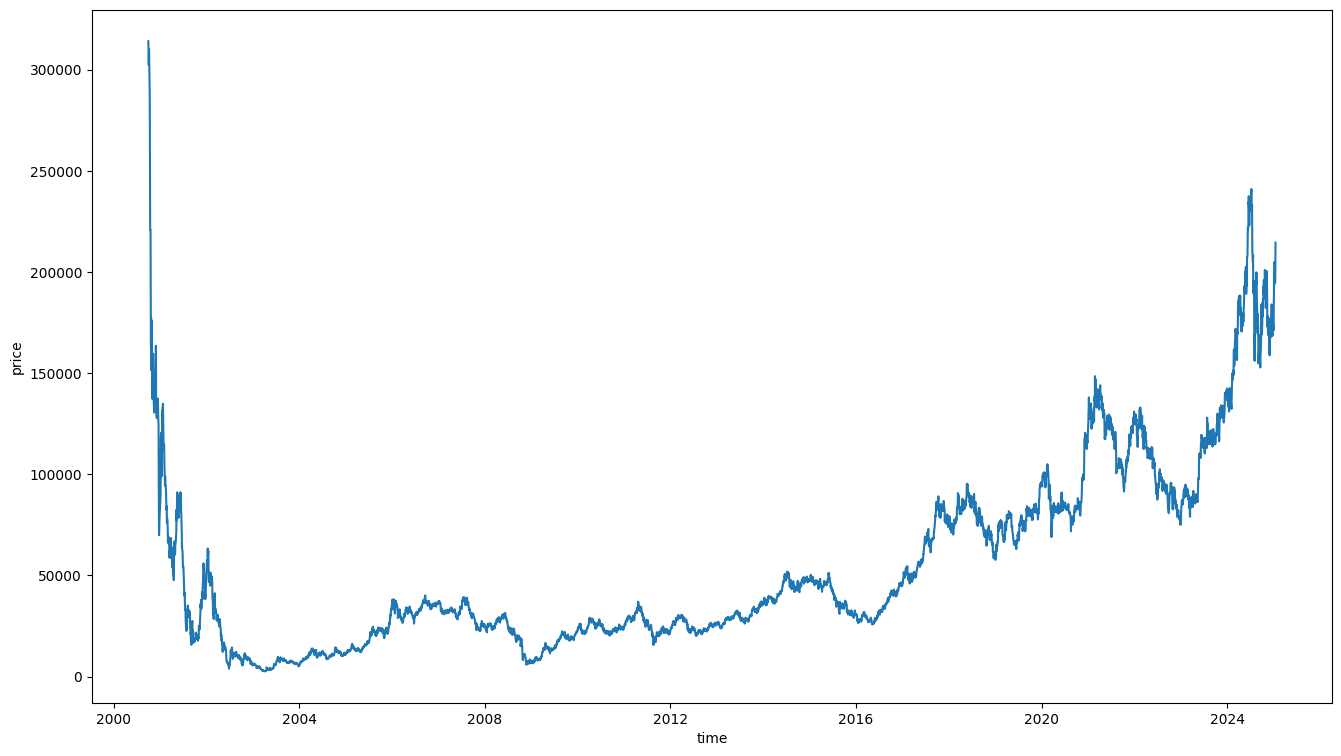

In [38]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=skhynix['Close'], x=skhynix.index)
plt.xlabel('time')
plt.ylabel('price')

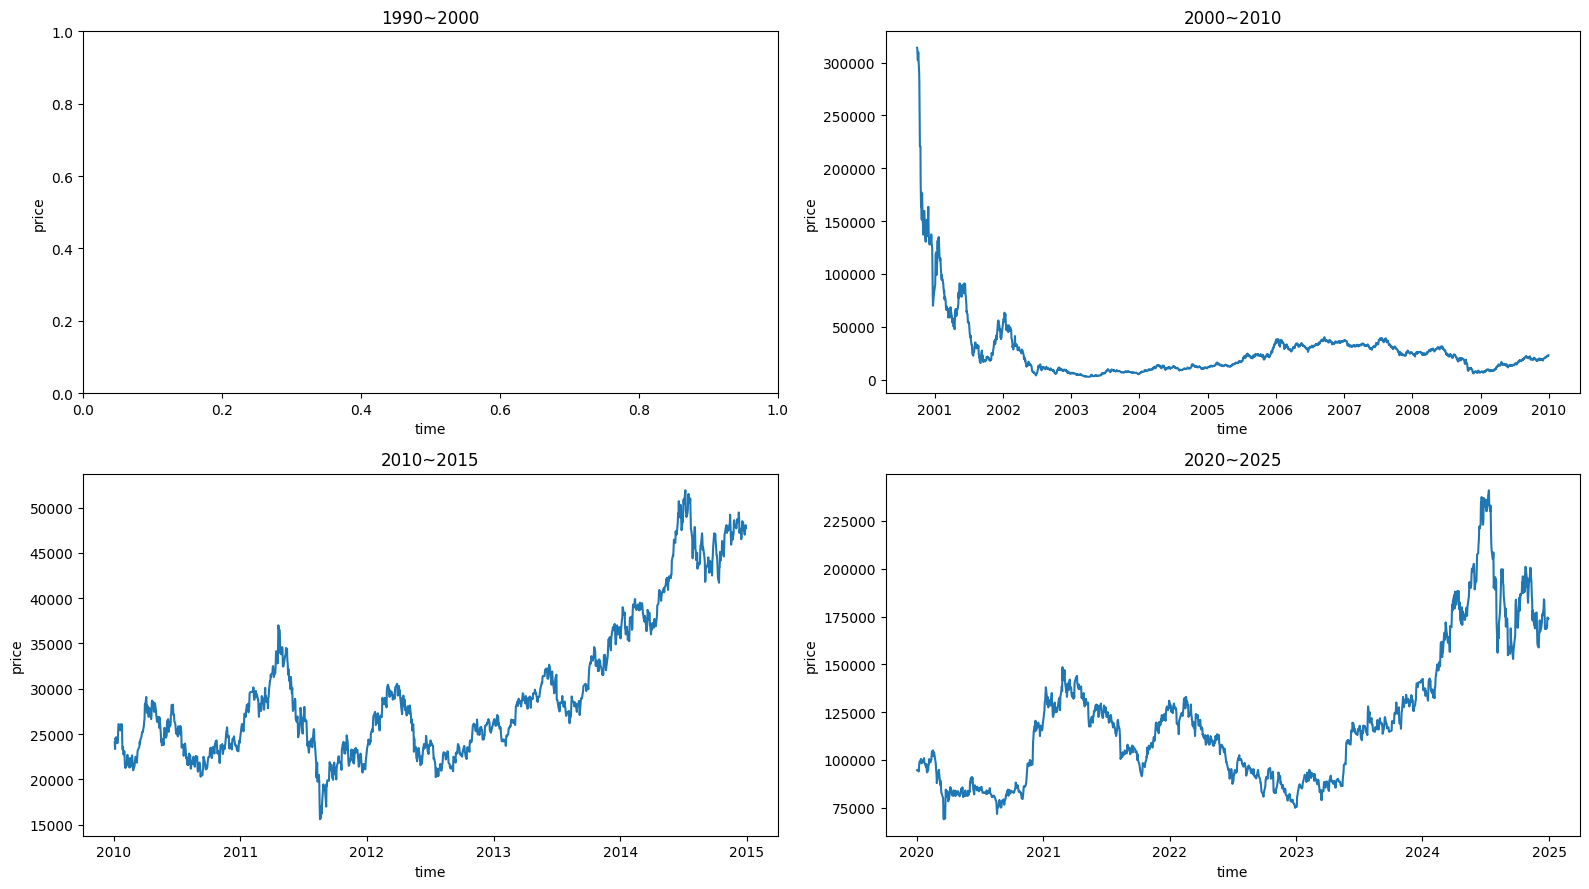

In [40]:
time_steps = [['1990', '2000'],
              ['2000', '2010'],
              ['2010', '2015'],
              ['2020', '2025']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = skhynix.loc[(skhynix.index > time_steps[i][0]) & (skhynix.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [41]:
#Data Preprocessing

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
scaled = scaler.fit_transform(skhynix[scale_cols])
scaled

array([[0.98755034, 1.        , 1.        , 1.        , 0.00343597],
       [1.        , 0.99691794, 0.98728116, 0.99684674, 0.00211331],
       [0.92530205, 0.94757991, 0.94276523, 0.96218018, 0.00139671],
       ...,
       [0.61947043, 0.623166  , 0.63252731, 0.62792206, 0.00197538],
       [0.65276677, 0.65144175, 0.66103617, 0.66581253, 0.00328986],
       [0.65593785, 0.67500487, 0.66913527, 0.68026228, 0.00273556]])

In [42]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(columns=['Close']),  # Drop the 'Close' column (features)
    df['Close'],                # Use the 'Close' column as the target
    test_size=0.2,              # 20% of the data for testing
    random_state=0,             # Random seed for reproducibility
    shuffle=False               # Do not shuffle the data
)

In [46]:
x_train.shape, y_train.shape

((4800, 4), (4800,))

In [47]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

In [48]:
x_train

,Open,High,Low,Volume
0,0.987550,1.000000,1.000000,0.003436
1,1.000000,0.996918,0.987281,0.002113
2,0.925302,0.947580,0.942765,0.001397
3,0.925302,0.984583,0.933228,0.003414
4,0.990664,0.996918,0.990459,0.003056
...,...,...,...,...
4795,0.291898,0.291083,0.290745,0.002534
4796,0.280165,0.281344,0.276167,0.004459
4797,0.276994,0.284171,0.278110,0.003482
4798,0.292849,0.290455,0.291393,0.003041


In [49]:
import tensorflow as tf

This function creates a windowed dataset suitable for time series forecasting. It takes a series of data and creates windows of a specified size, where each window becomes a training example. The last element of each window is used as the label (what we're trying to predict), while all preceding elements are used as inputs.

In [50]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [52]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [53]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [54]:
# Inspect the first batch of the training data
for data in train_data.take(1):
    print(f'Dataset(X) structure (batch_size, window_size, number of features): {data[0].shape}')
    print(f'Dataset(Y) structure (batch_size, number of features): {data[1].shape}')


Dataset(X) structure (batch_size, window_size, number of features): (32, 20, 1)
Dataset(Y) structure (batch_size, number of features): (32, 1)


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # Create 1D feature map
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
# We use Huber() loss, which generally performs well for sequence learning tasks
loss = Huber()

# Initialize Adam optimizer with a learning rate of 0.0005
optimizer = Adam(0.0005)

# Compile the model with Huber loss, Adam optimizer, and mean squared error (MSE) as a metric
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])


In [68]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.1,          # Reduce learning rate by a factor of 0.1
    patience=5,          # Wait for 5 epochs before reducing LR
    verbose=1
)

In [69]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=100,
    callbacks=[reduce_lr]
)


Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 7.8744e-05 - mse: 1.5749e-04 - val_loss: 0.0013 - val_mse: 0.0025 - learning_rate: 5.0000e-04
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 7.4177e-05 - mse: 1.4835e-04 - val_loss: 0.0011 - val_mse: 0.0022 - learning_rate: 5.0000e-04
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 7.0255e-05 - mse: 1.4051e-04 - val_loss: 0.0010 - val_mse: 0.0021 - learning_rate: 5.0000e-04
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5.9386e-05 - mse: 1.1877e-04 - val_loss: 9.8575e-04 - val_mse: 0.0020 - learning_rate: 5.0000e-04
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5.8607e-05 - mse: 1.1721e-04 - val_loss: 9.1803e-04 - val_mse: 0.0018 - learning_rate: 5.0000e-04
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 5.7918e-05 - mse: 1.1584e-04 - val_loss: 7.9602e-04 - val_mse: 0.0016 - learning_rate: 5.0000e-04
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/ste

In [70]:
# Evaluate the model on the test data
test_loss, test_mse = model.evaluate(test_data)
print(f'Test Loss: {test_loss}')
print(f'Test MSE: {test_mse}')

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.5151e-04 - mse: 3.0301e-04
Test Loss: 0.0007131794700399041
Test MSE: 0.0014263589400798082


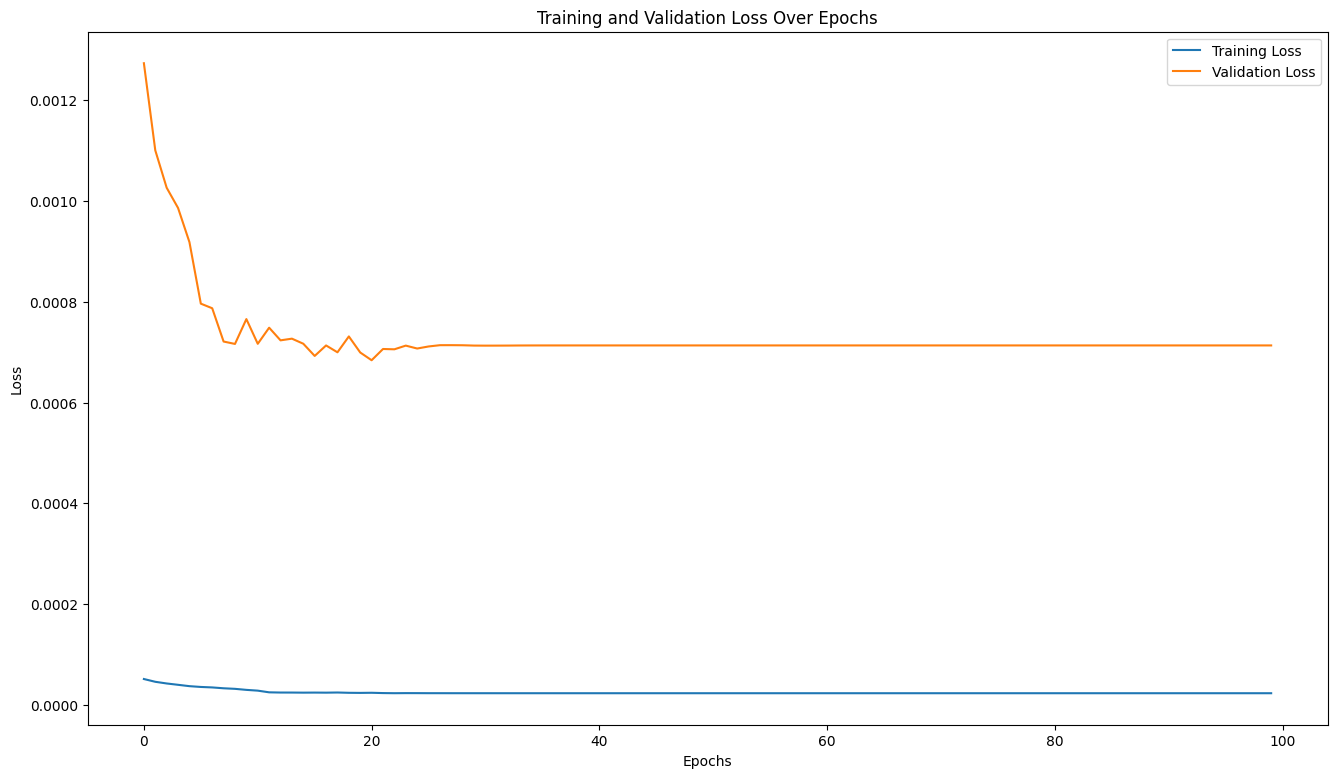

In [71]:
# Plot training and validation loss
plt.figure(figsize=(16, 9))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [72]:
# Make predictions on the test data
predictions = model.predict(test_data)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [73]:
# Flatten the predictions and y_test to 1D arrays for visualization
predictions = predictions.flatten()
y_test_values = y_test[WINDOW_SIZE:].values  # Align y_test with predictions

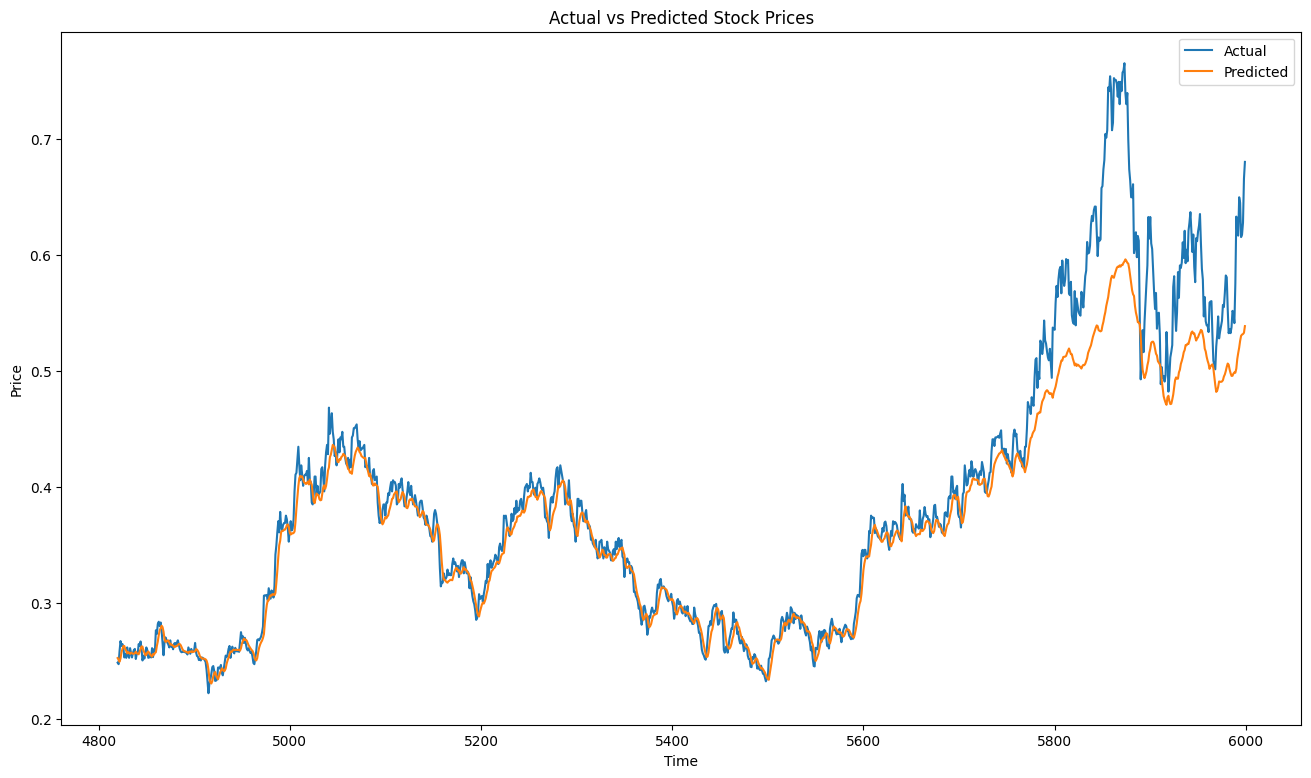

In [74]:
# Visualize the actual vs predicted stock prices
plt.figure(figsize=(16, 9))
plt.plot(y_test.index[WINDOW_SIZE:], y_test_values, label='Actual')
plt.plot(y_test.index[WINDOW_SIZE:], predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()